# Downside!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import edhek_risk_kit as erk
import pandas as pd

In [3]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [4]:
# Semideviation (Standard deviation os values that are negative, i.e. downside)
hfi.std(ddof=0)
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [5]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR
Value at Risk

- Historic VaR
- Parametric VaR (Gaussian)
- Modified Cornish-Fisher VaR

In [6]:
import numpy as np

np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [7]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [8]:
from scipy.stats import norm

In [9]:
# The z-score at 0.05 level
z = norm.ppf(.05)

In [10]:
# VaR at 5 percent level using the Parametric Gaussian method
-(hfi.mean() + z * hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [11]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [12]:
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

In [13]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1, keys=["Gaussian", "Cornish-Fisher", "Historic"])
comparison

,Gaussian,Cornish-Fisher,Historic
Convertible Arbitrage,0.021691,0.025166,0.01576
CTA Global,0.034235,0.033094,0.03169
Distressed Securities,0.021032,0.025102,0.01966
Emerging Markets,0.047164,0.053011,0.04247
Equity Market Neutral,0.008850,0.010734,0.00814
Event Driven,0.021144,0.025516,0.02535
Fixed Income Arbitrage,0.014579,0.017881,0.00787
Global Macro,0.018766,0.013581,0.01499
Long/Short Equity,0.026397,0.027935,0.02598
Merger Arbitrage,0.010435,0.012612,0.01047


<Axes: title={'center': 'EDHEC Hedge Fund Indices - VaR'}>

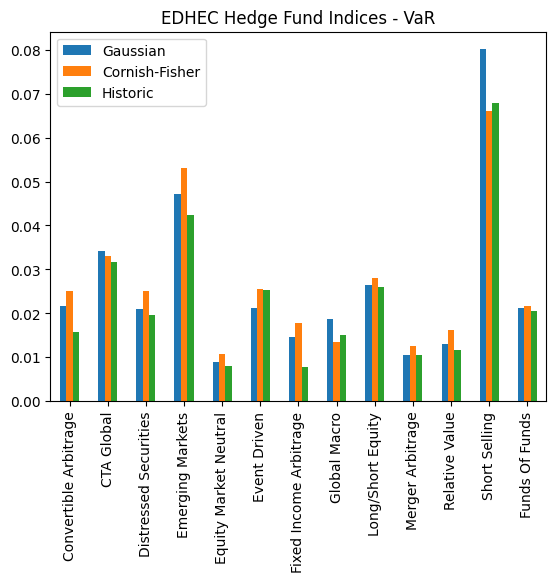

In [14]:
comparison.plot.bar(title="EDHEC Hedge Fund Indices - VaR")

### Beyond VaR aka CVaR

In [15]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [16]:
erk.cvar_gaussian(hfi)

Convertible Arbitrage     0.049687
CTA Global                0.043527
Distressed Securities     0.040864
Emerging Markets          0.083820
Equity Market Neutral     0.018292
Event Driven              0.037440
Fixed Income Arbitrage    0.052500
Global Macro              0.025783
Long/Short Equity         0.043162
Merger Arbitrage          0.019143
Relative Value            0.026733
Short Selling             0.106620
Funds Of Funds            0.034185
dtype: float64

In [17]:
erk.cvar_gaussian(hfi, modified=True)

Convertible Arbitrage     0.058200
CTA Global                0.042000
Distressed Securities     0.055600
Emerging Markets          0.092488
Equity Market Neutral     0.021044
Event Driven              0.039331
Fixed Income Arbitrage    0.052500
Global Macro              0.019244
Long/Short Equity         0.044558
Merger Arbitrage          0.023400
Relative Value            0.029310
Short Selling             0.093075
Funds Of Funds            0.034185
dtype: float64